In [1]:
import pandas as pd
import glob

In [2]:
files = glob.glob("RNA_triadic/*")

In [3]:
dt = dict()
for file in files:
    fname = file.split('/')[-1]    
    df = pd.read_table(file, header=None, names=["gene_name", "type"])
    dt[fname] = set(df.gene_name.to_list())

In [4]:
from collections import Counter
rna_cnts = {}
for file in files:
    rnas = pd.read_table(file, header=None, names=["gene_name", "type"]).gene_name.to_list()
    for rna in rnas:
        if rna in rna_cnts:
            rna_cnts[rna] += 1
        else:
            rna_cnts[rna] = 1

plottable = dict(Counter(rna_cnts.values()))
plottable = pd.DataFrame.from_dict(plottable.items()).rename(
    columns = {0:"Presence in N triad files", 1:"RNA Count"})
plottable

,Presence in N triad files,RNA Count
0,32,4
1,26,6
2,13,10
3,31,5
4,34,1
5,25,4
6,30,3
7,38,2
8,24,7
9,28,3


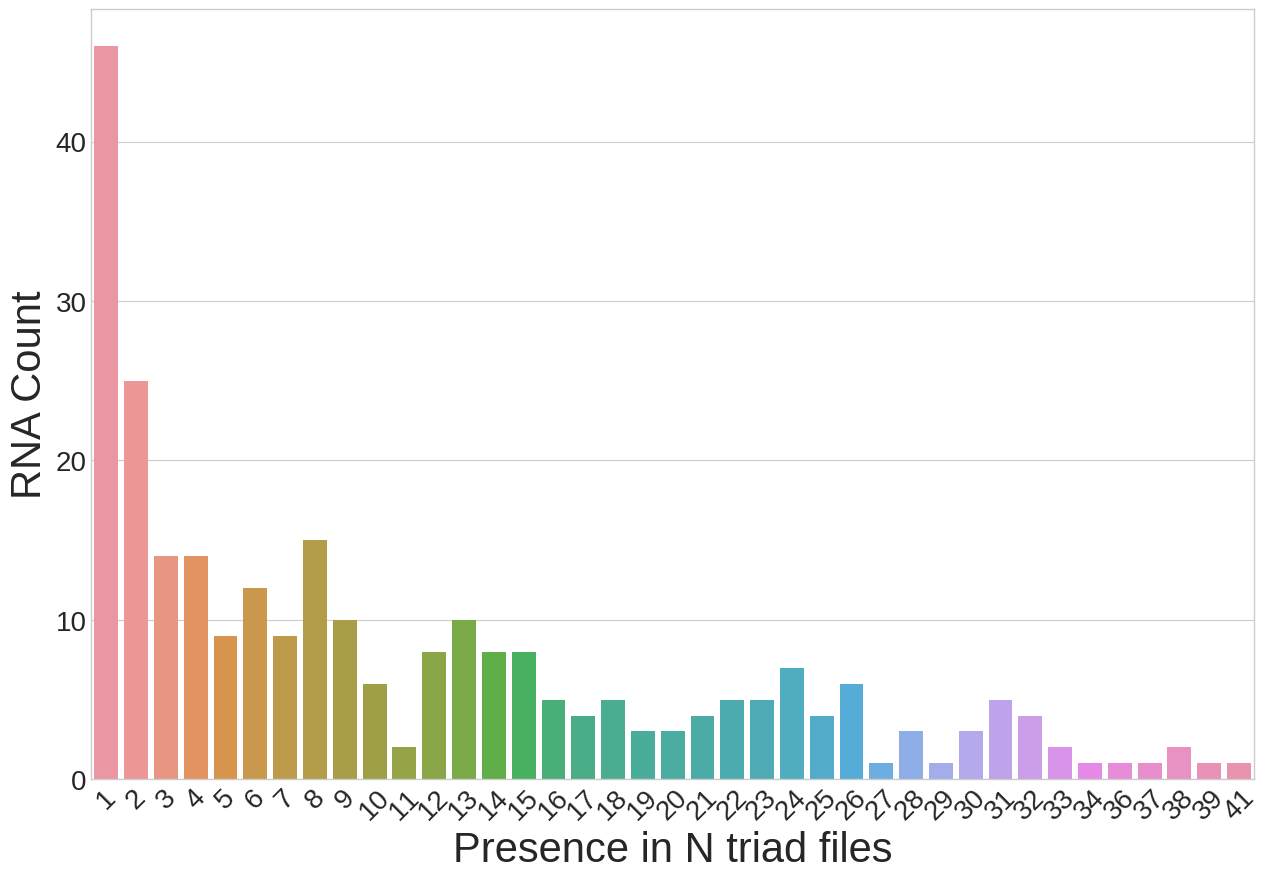

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")

plt.figure(figsize=(15,10))
sns.barplot(data=plottable, x="Presence in N triad files", y="RNA Count")
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.xlabel(xlabel = "Presence in N triad files", fontsize=30)
plt.ylabel(ylabel = "RNA Count", fontsize=30)
plt.savefig("/home/daniil/Desktop/common_rna.pdf")

## same but w/ eclips

In [3]:
files = glob.glob("RNA_IP/*")
dt = dict()
for file in files:
    fname = file.split('/')[-1]    
    df = pd.read_table(file, header=None, names=["gene_name", "type"])
    dt[fname] = set(df.gene_name.to_list())

In [4]:
from collections import Counter
rna_cnts = {}
for file in files:
    rnas = pd.read_table(file, header=None, names=["gene_name", "type"]).gene_name.to_list()
    for rna in rnas:
        if rna in rna_cnts:
            rna_cnts[rna] += 1
        else:
            rna_cnts[rna] = 1

plottable = dict(Counter(rna_cnts.values()))
plottable = pd.DataFrame.from_dict(plottable.items()).rename(
    columns = {0:"Presence in N triad files", 1:"RNA Count"})
plottable

,Presence in N triad files,RNA Count
0,22,413
1,17,503
2,38,206
3,7,868
4,21,378
5,1,6733
6,28,312
7,25,375
8,33,225
9,34,255


Text(0, 0.5, 'RNA Count')

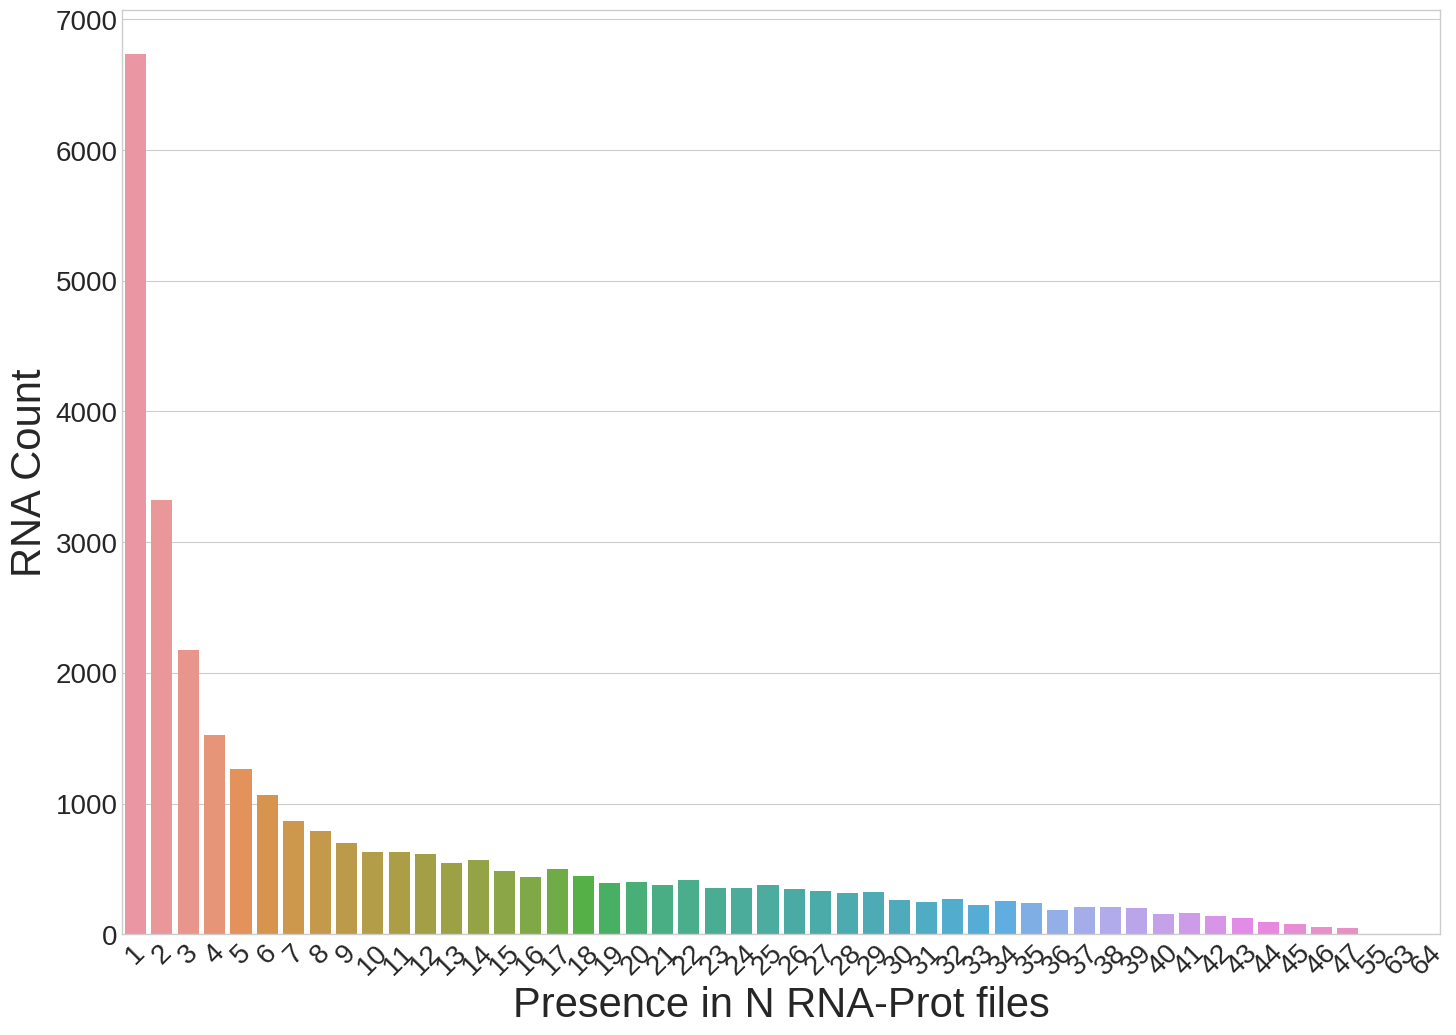

In [8]:
import seaborn as sns
import matplotlib.pyplot as plt

plt.style.use("seaborn-v0_8-whitegrid")

plt.figure(figsize=(17,12))
sns.barplot(data=plottable, x="Presence in N triad files", y="RNA Count")
plt.xticks(fontsize=20, rotation=45)
plt.yticks(fontsize=20)
plt.xlabel(xlabel = "Presence in N RNA-Prot files", fontsize=30)
plt.ylabel(ylabel = "RNA Count", fontsize=30)

## Get RNAs that are "Common" -- are present in $\ge$ 10 triads

In [3]:
from collections import Counter
rna_cnts = {}
for file in files:
    rnas = pd.read_table(file, header=None, names=["gene_name", "type"]).gene_name.to_list()
    for rna in rnas:
        if rna in rna_cnts:
            rna_cnts[rna] += 1
        else:
            rna_cnts[rna] = 1

plottable = dict(Counter(rna_cnts.values()))

In [5]:
common_rna = {k: v for k, v in rna_cnts.items() if v >= 30}

with open("common_rna30.txt", 'w') as fout:
    for key in common_rna:
        fout.write(f"{key}\n")